In [1]:
import os
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

## Loading datasets

Data source: https://www.kaggle.com/c/aerial-cactus-identification/data

### Move train set to subdirs for each class

In [2]:
%%bash 
unzip train.zip -d dataset/ > /dev/null 2>&1

In [3]:
train_dir = 'dataset/train/'
cactus_dir = os.path.join(train_dir, 'cactus')
no_cactus_dir = os.path.join(train_dir, 'no_cactus')

if not os.path.exists(cactus_dir):
    os.mkdir(cactus_dir)
    os.mkdir(no_cactus_dir)

train_csv_df = pd.read_csv('dataset/train.csv')
train_csv_df['label'] = train_csv_df.has_cactus.map({0: 'no_cactus', 1: 'cactus'})
train_csv_df['path'] =  train_dir + train_csv_df['label'] + '/' + train_csv_df['id']

train_csv_df.head()

,id,has_cactus,label,path
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1,cactus,dataset/train/cactus/0004be2cfeaba1c0361d39e2b...
1,000c8a36845c0208e833c79c1bffedd1.jpg,1,cactus,dataset/train/cactus/000c8a36845c0208e833c79c1...
2,000d1e9a533f62e55c289303b072733d.jpg,1,cactus,dataset/train/cactus/000d1e9a533f62e55c289303b...
3,0011485b40695e9138e92d0b3fb55128.jpg,1,cactus,dataset/train/cactus/0011485b40695e9138e92d0b3...
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1,cactus,dataset/train/cactus/0014d7a11e90b62848904c141...


In [4]:
train_csv_df.apply(lambda x: os.rename(os.path.join(train_dir, x[0]), x[3]), axis=1);

### Show image

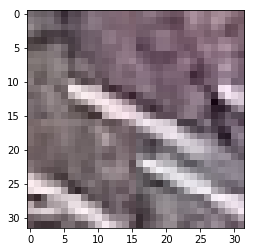

In [5]:
img = tf.keras.preprocessing.image.load_img(train_csv_df.loc[1, 'path'])
x = tf.keras.preprocessing.image.img_to_array(img)
plt.imshow(x/255.)

### Create Image Data Generator

In [6]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
)

train_gen = train_datagen.flow_from_directory(train_dir)

Found 17500 images belonging to 2 classes.


## Create model

In [8]:
clf = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

clf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

In [ ]:
cf